# Infinite Square Well Potential Solution

This jupyter notebook solves the infinite square well potential numerically to demonstrate boundary value problems for an example that you know the solution.

Solve the Time Independent Schrodinger Equation
      $-\frac{h^2}{2m} \frac{d^2 \psi}{dt^2}  = E \psi$ over the interval $- x_0 < x < x_0$

Define on interval $[x_{start}, x_{end}]$ with boundary conditions
   $\psi(x_{start}) = \psi(x_{end}) = 0,    \psi'(x_{start}) = a$


In [17]:
from scipy.integrate import solve_bvp
import numpy as np

# Solving the infinite square well potential



# Define some constants
n = 1; # Actual quantum number
h = 6.62e-16 #Planck's Constant in aJs 
m = 9.109e-31; # Electron mass in kgs 
d = 1; # The well width in nm

# Some initial values and meshpoints
ninit = 100  # The initial number of mesh points
norm_new = 1
E_init = 0.0 # The initial guess for Energy Eigen Value that works


# Derived quantities
x_start = -d/2 # The start of the interval
x_end = d/2   #The end of the interval
E_actual = (n*h)**2/(8*m*d**2) # Actual Energy Value
hbar = h/(2*np.pi) # The hbar value
c = 2*m/(hbar**2) 


# Function that holds the derivatives of the diffential equation 
def fun(x, y, p):
    E = p[0]
    # We can unpack y this way, or we could do it by writing: y1, y2 = y
    y1 = y[0]
    y2 = y[1]
    # Now we write out the differential equations
    dy1_dx = y2
    dy2_dx = -E*y1*c
    return np.array([ dy1_dx, dy2_dx ])

# Function that contains the boundary values
def bc(ya, yb, p):
    y1a, y2a = ya
    y1b, y2b = yb
    return np.array([y1a, y1b, y2a-1/d ])

# Define the mesh that you want to solve over
x = np.linspace(x_start,x_end,ninit)

# Define some intial guesses over
psi_initial = np.zeros((2,x.size))
psi_initial[0] = 0.1*np.ones(len(x)) 

# Now solve the equation wih an initial guess of 6 for E
sol = solve_bvp(fun, bc, x, psi_initial, p=[E_init])

print('Energy Eigenvalue =',sol.p[0])
print('Exact Energy Eigen Value=',E_actual)

Energy Eigenvalue = 0.06013677708465502
Exact Energy Eigen Value= 0.06013887364145352


0.22507959429909838


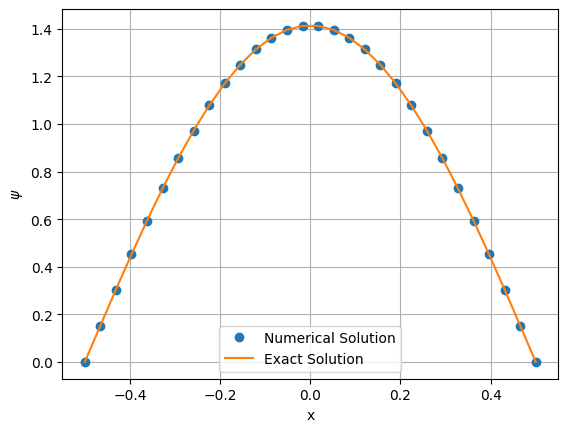

In [18]:
import matplotlib.pyplot as plt

x_plot = np.linspace(x_start, x_end, 30)
y_plot = sol.sol(x_plot)[0]

#Calculate exact wavefunction
psi_actual = lambda x: np.sqrt(2/d)*np.cos(np.pi*x_plot/d)

# Calculate a normalization function
norm = np.sqrt(np.trapz((np.absolute(y_plot))**2,x_plot))
print(norm)
# Now plot
plt.figure(1)
plt.plot(x_plot, y_plot/norm,'o',label = 'Numerical Solution')
plt.plot(x_plot, psi_actual(x_plot),label = 'Exact Solution')
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.grid()
plt.legend()
plt.show()
